#### Objective:

The goal of this project is to study and predict the right group of new customers for an automotive company,To segment customer into 4 segments (A, B, C, D )using the Kaggle dataset containing various customer details using different classification Techniques Logistic Regression,Random Forest classifier, Descisiontree classifier after doing EDA and data cleaning on the dataset.


In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"C:\Users\rharipri\Downloads\train.csv")

data.head(4)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B


In [3]:
len(data.index)

4977

#### Data Description 

ID	- Unique ID
Gender	- Gender of the customer
Ever_Married -	Marital status of the customer
Age	- Age of the customer
Graduated	- Is the customer a graduate?
Profession	- Profession of the customer
Work_Experience -	Work Experience in years
Spending_Score -	Spending score of the customer
Family_Size	- Number of family members for the customer (including the customer)
Var_1	- Anonymised Category for the customer
Segmentation	(target) - Customer Segment of the customer(A,B,C,D)

In [4]:
# Display a description of the dataset
stats = data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
ID,4977.0,463474.101065,2600.138303,458984.0,461248.0,463440.0,465731.0,467974.0
Age,4977.0,43.422946,16.838978,18.0,30.0,40.0,53.0,89.0
Work_Experience,4478.0,2.687584,3.431383,0.0,0.0,1.0,5.0,14.0
Family_Size,4766.0,2.850399,1.516771,1.0,2.0,3.0,4.0,9.0


In [5]:
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [6]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
new_df=data.sample(3)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
new_df['Gender']=encoder.fit_transform(new_df['Gender'])
new_df['Segmentation']=encoder.fit_transform(new_df['Segmentation'])
df_raw=pd.read_csv(r"C:\Users\rharipri\Downloads\train.csv")
test_raw=pd.read_csv(r"C:\Users\rharipri\Downloads\test.csv")

In [8]:
# create functions for data exploration
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

def plot_numeric(df, col):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    sns.histplot(data=df, x=col, ax=ax[0]).set_title(col+'_hist')
    sns.kdeplot(data=df, x=col, ax=ax[1]).set_title(col+'_kde')
    sns.boxplot(data=df, y=col, ax=ax[2]).set_title(col+'_box')
    plt.show()
    
def plot_category(df, col):
    fig, ax = plt.subplots(figsize=(18,12))
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index).set_title(col+'_count')
    plt.show()
    
def plot_corr(df):
    fig, ax = plt.subplots(figsize=(18,12))
    num_col = df.select_dtypes(include='number').columns.values
    sns.heatmap(df[num_col].corr(), vmin=-1, vmax=1,
                annot=True, square=True, ax=ax)
    plt.title('Correlation Matrix')
    plt.show()

def get_corr_list(df):
    num_col = df.select_dtypes(include='number').columns.values
    df_corr = df[num_col].corr().unstack().sort_values(ascending=False)\
            .drop_duplicates()
    print(df_corr)

def get_null(df):
    print(df.isna().sum())

def get_describe(df):
    print(df.describe(include='all'))

Training dataset
ID                   0
Gender               0
Ever_Married        88
Age                  0
Graduated           46
Profession          74
Work_Experience    499
Spending_Score       0
Family_Size        211
Var_1               42
Segmentation         0
dtype: int64
Testing dataset
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64
----------------------------------------------------------------------------------------------------

Training dataset
                   ID Gender Ever_Married          Age Graduated Profession  \
count     4977.000000   4977         4889  4977.000000      4931       4903   
unique            NaN      2            2          NaN         2          9   
top               NaN   Male          Yes          NaN       Yes     Artist   


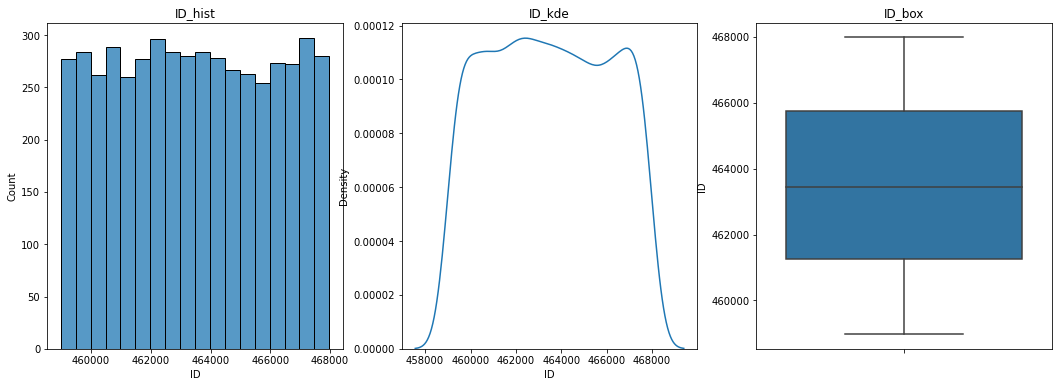

Testing dataset


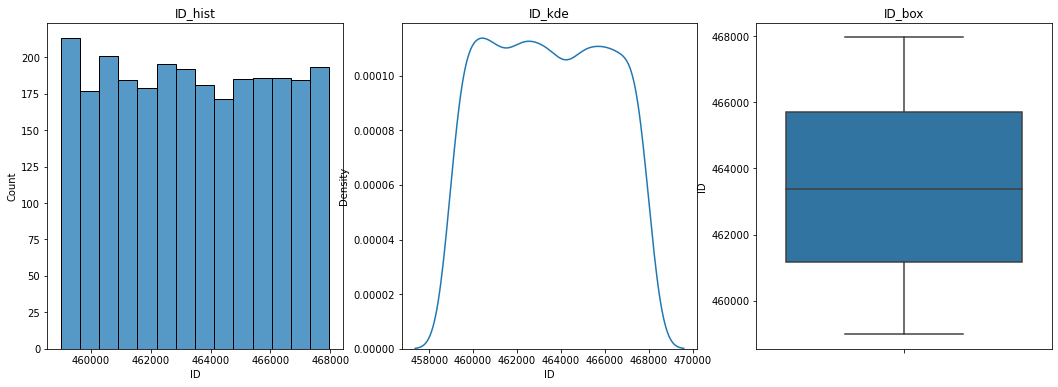

Age
Training dataset


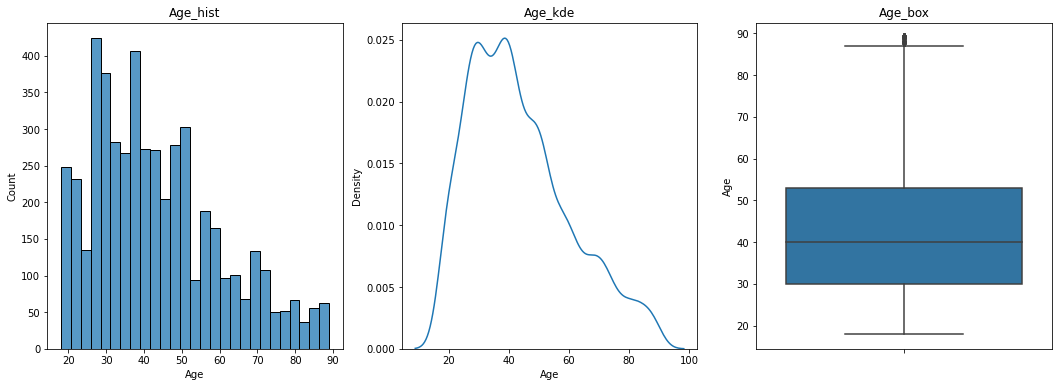

Testing dataset


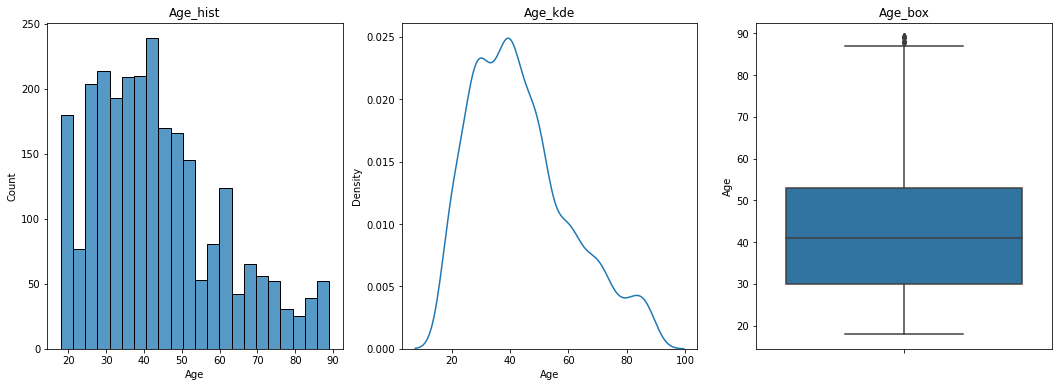

Work_Experience
Training dataset


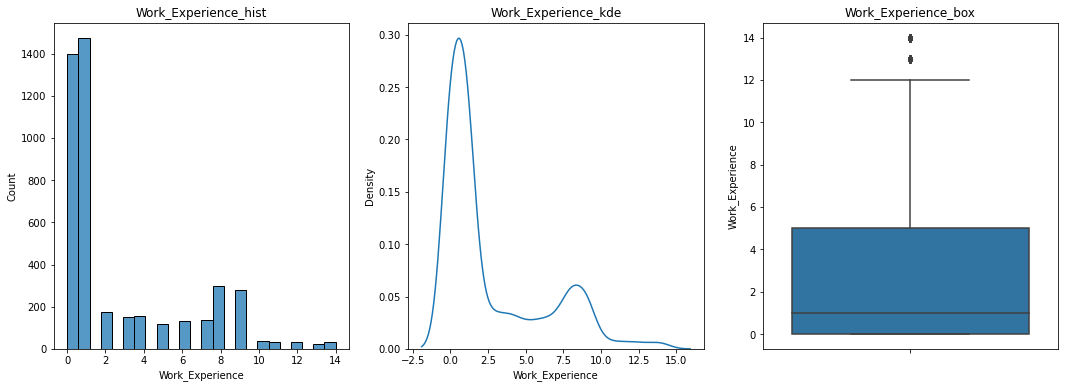

Testing dataset


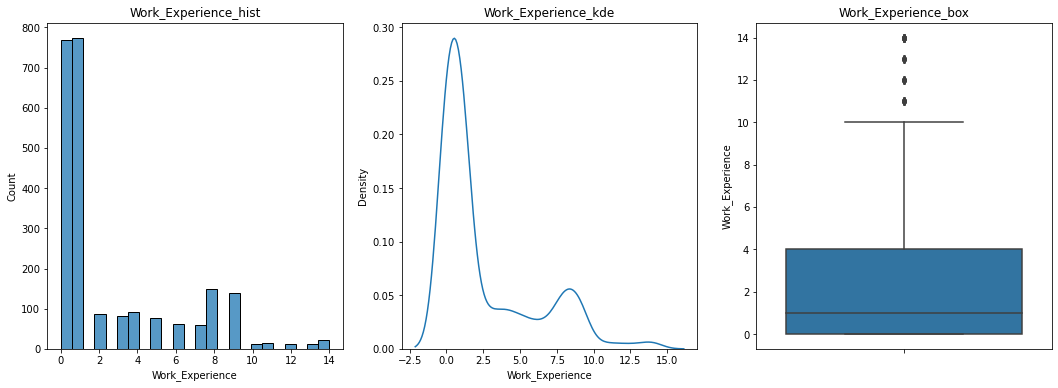

Family_Size
Training dataset


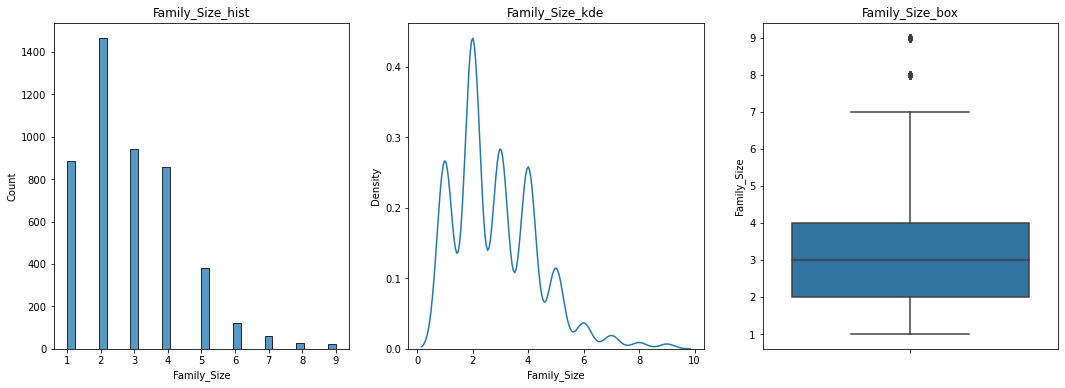

Testing dataset


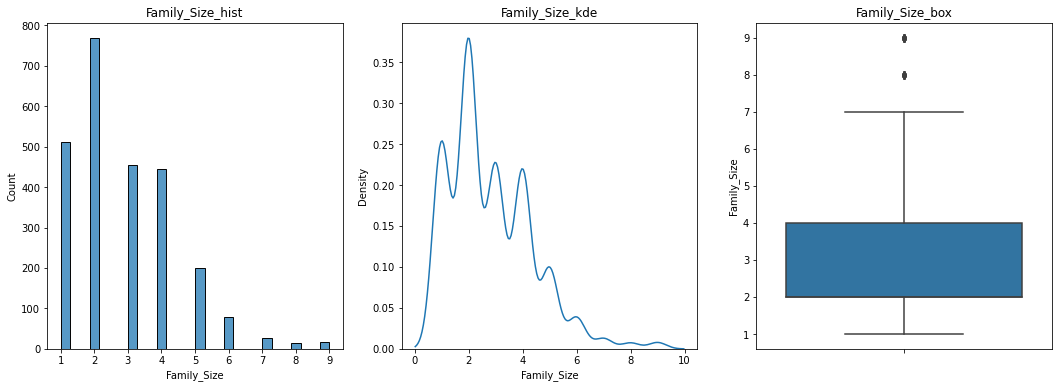

----------------------------------------------------------------------------------------------------

Gender
Training dataset


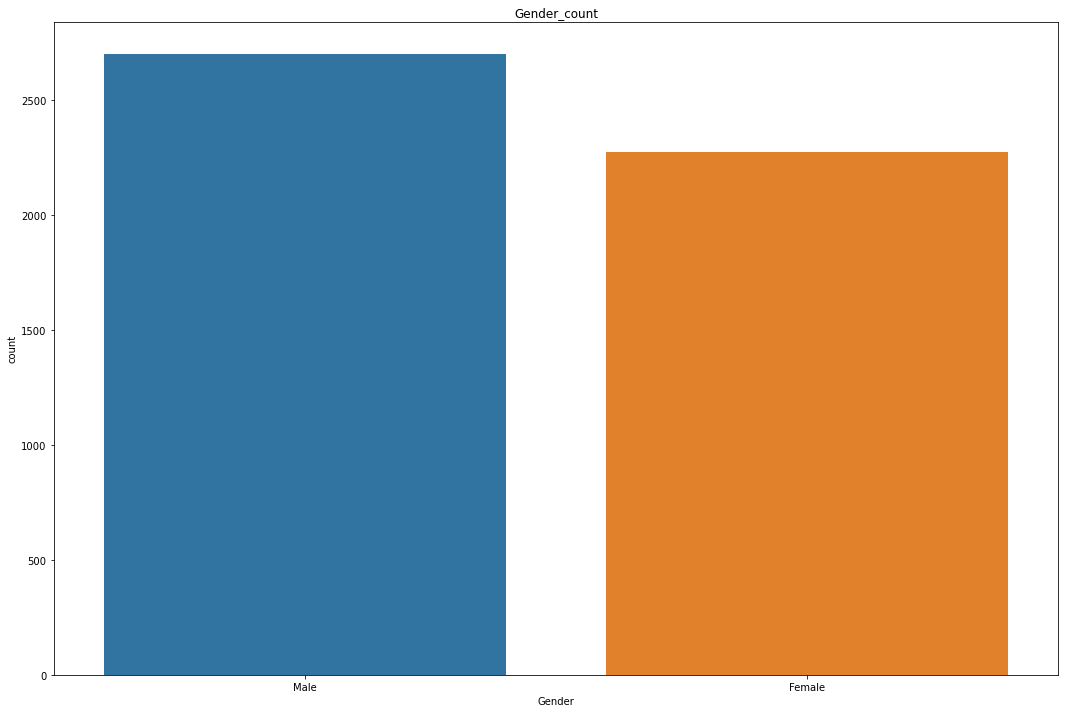

Testing dataset


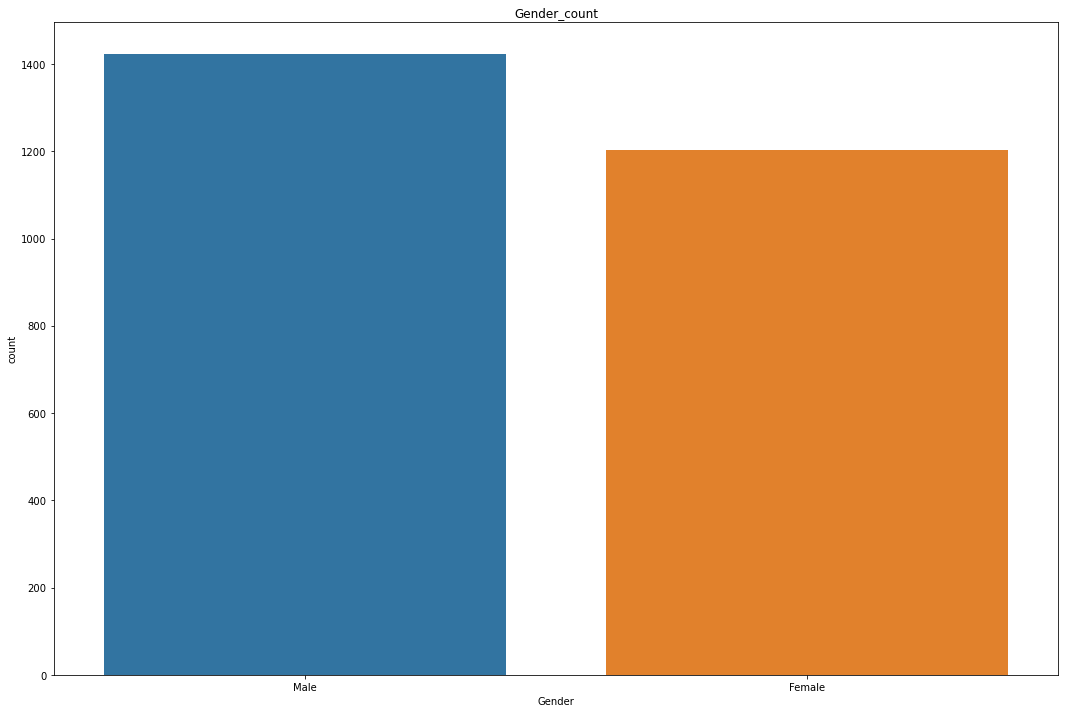

Ever_Married
Training dataset


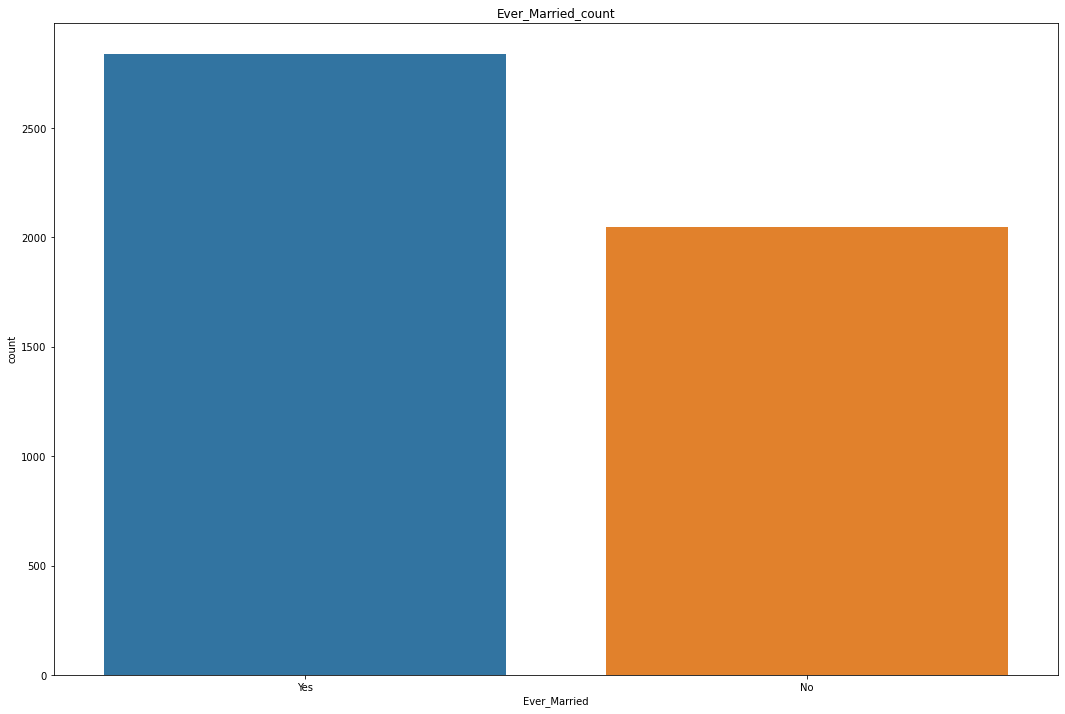

Testing dataset


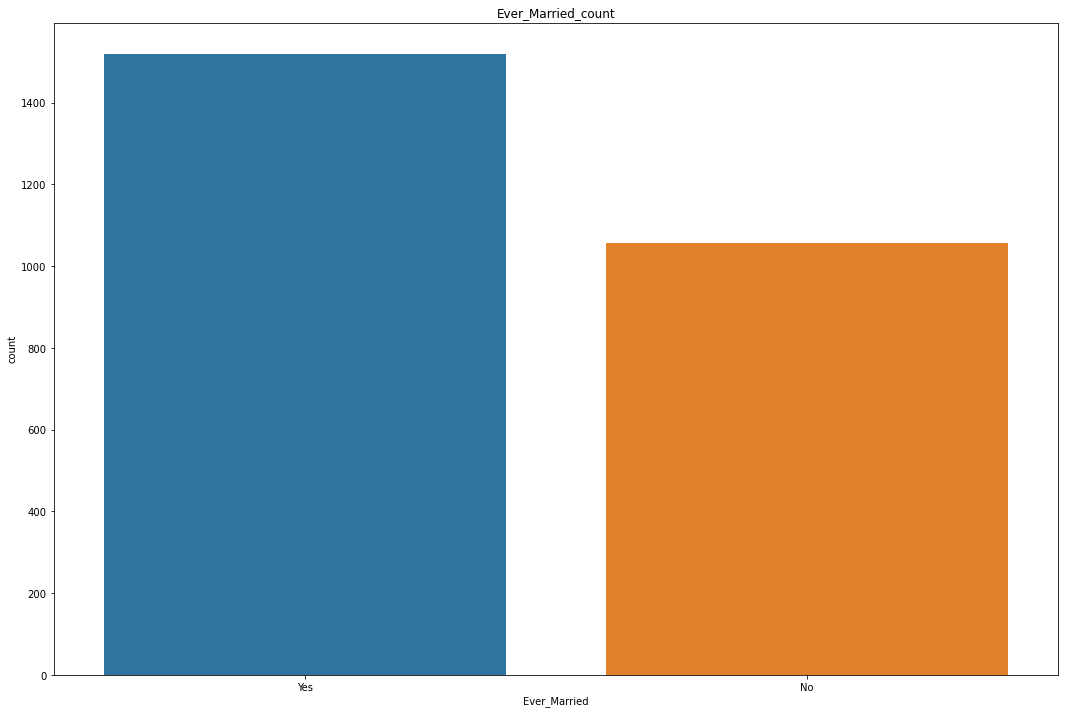

Graduated
Training dataset


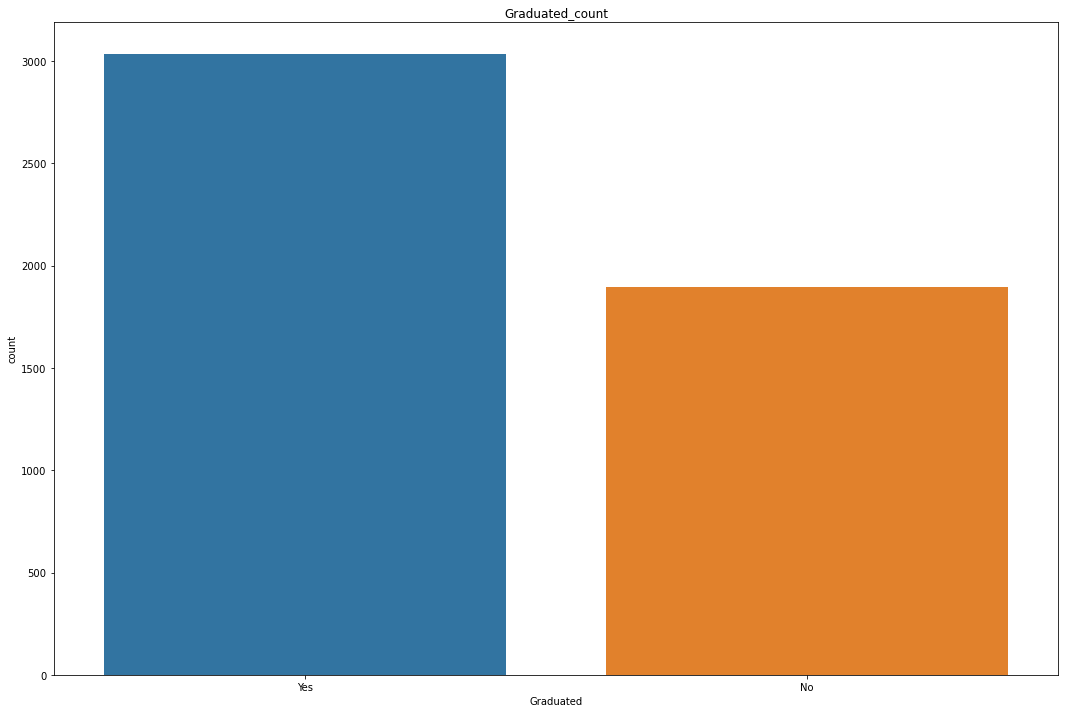

Testing dataset


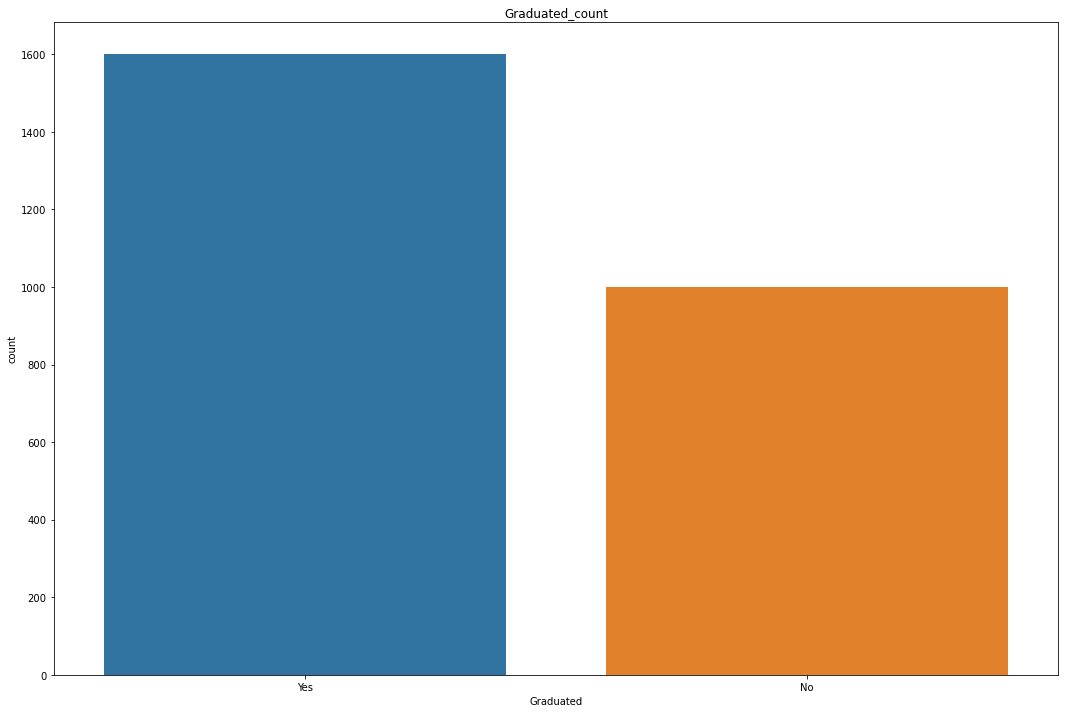

Profession
Training dataset


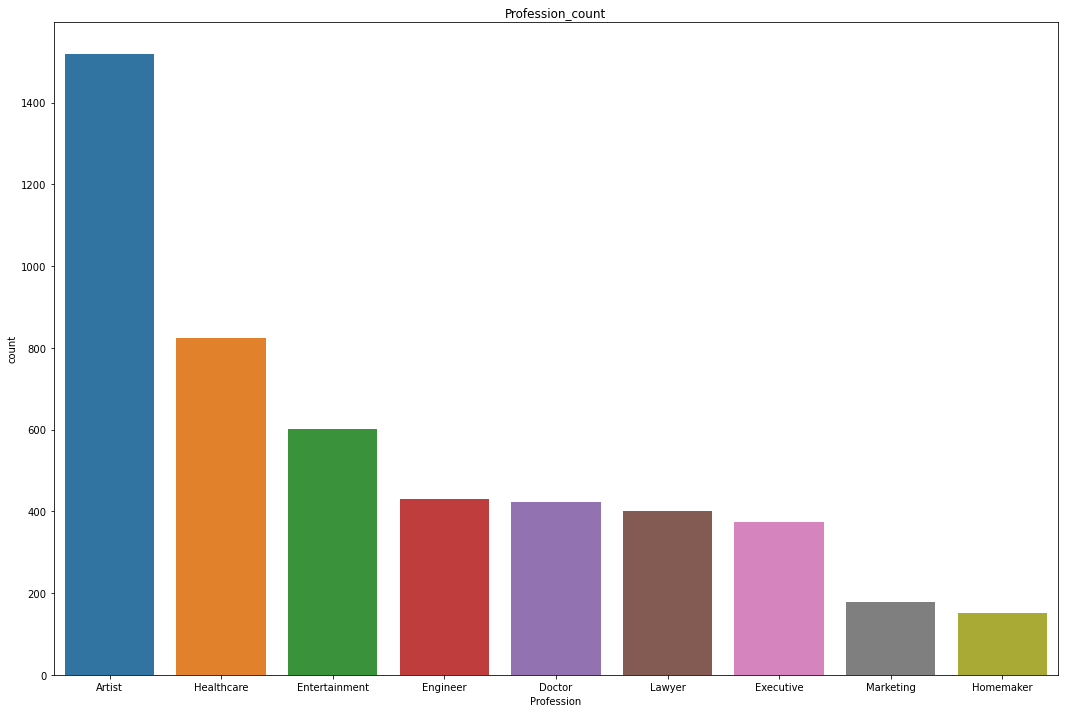

Testing dataset


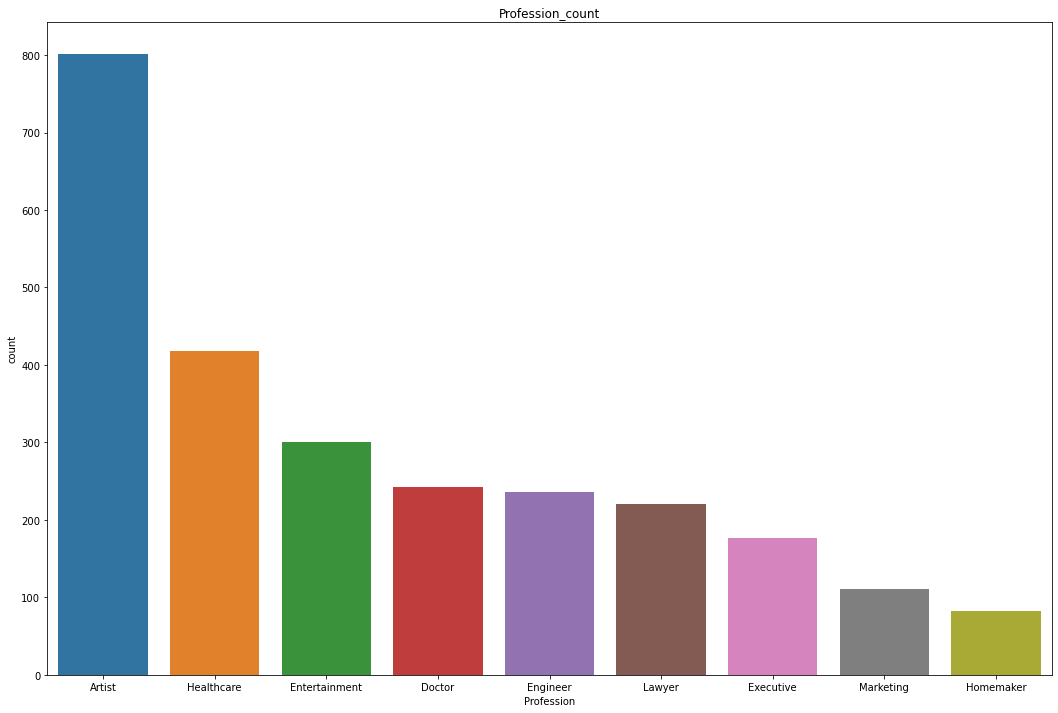

Spending_Score
Training dataset


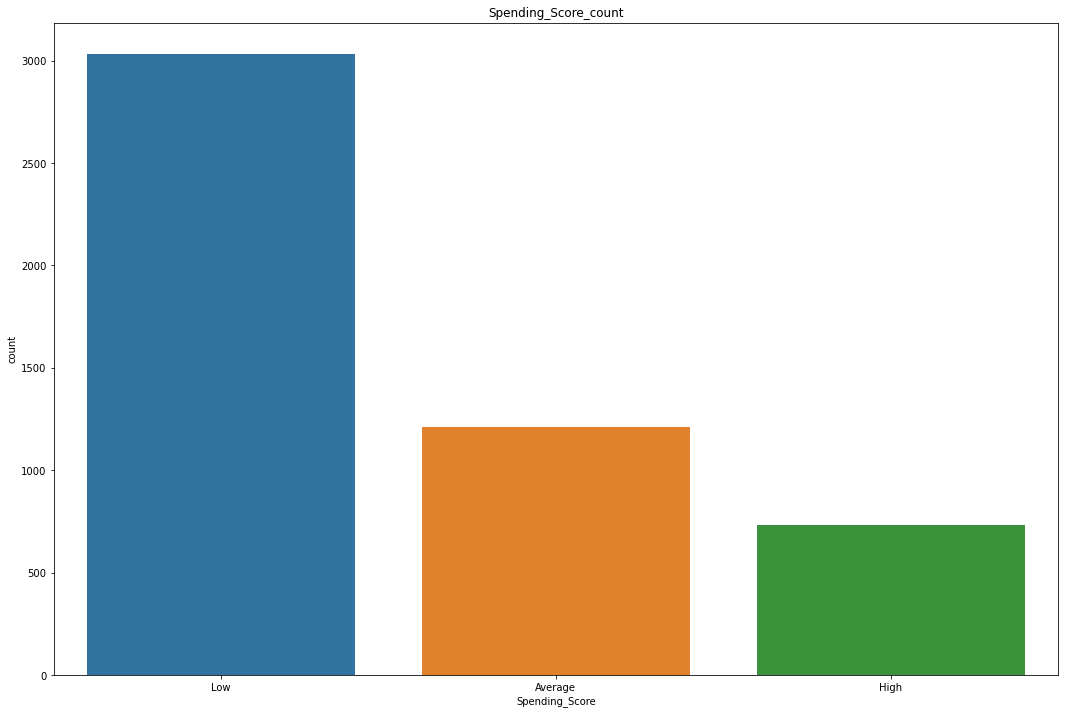

Testing dataset


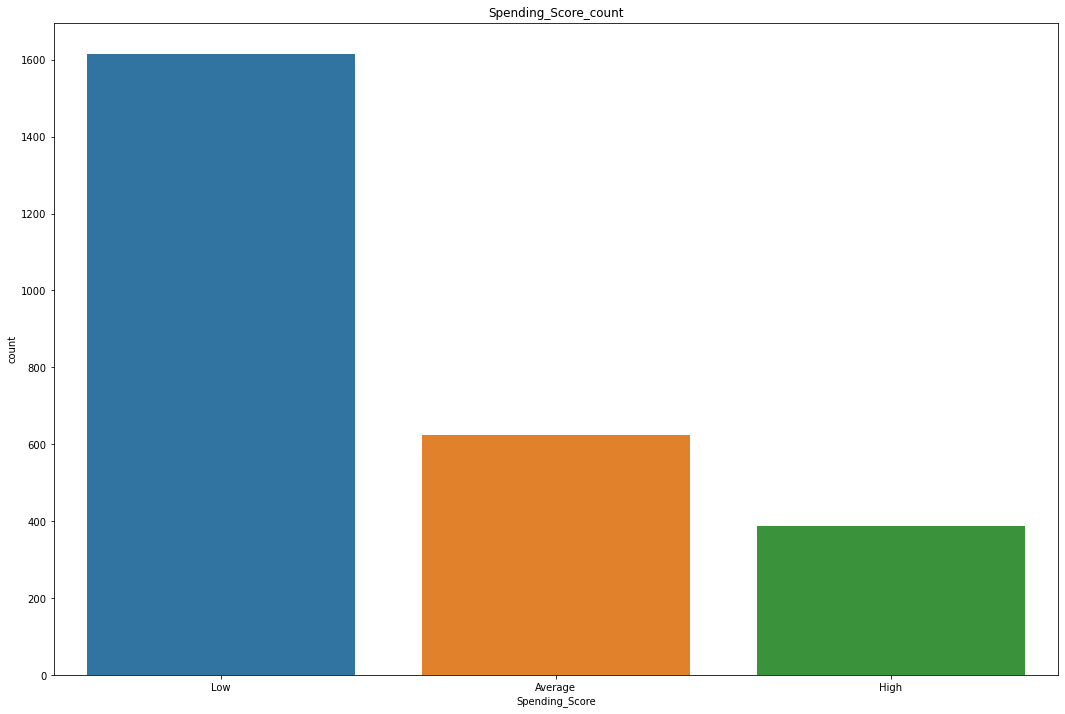

Var_1
Training dataset


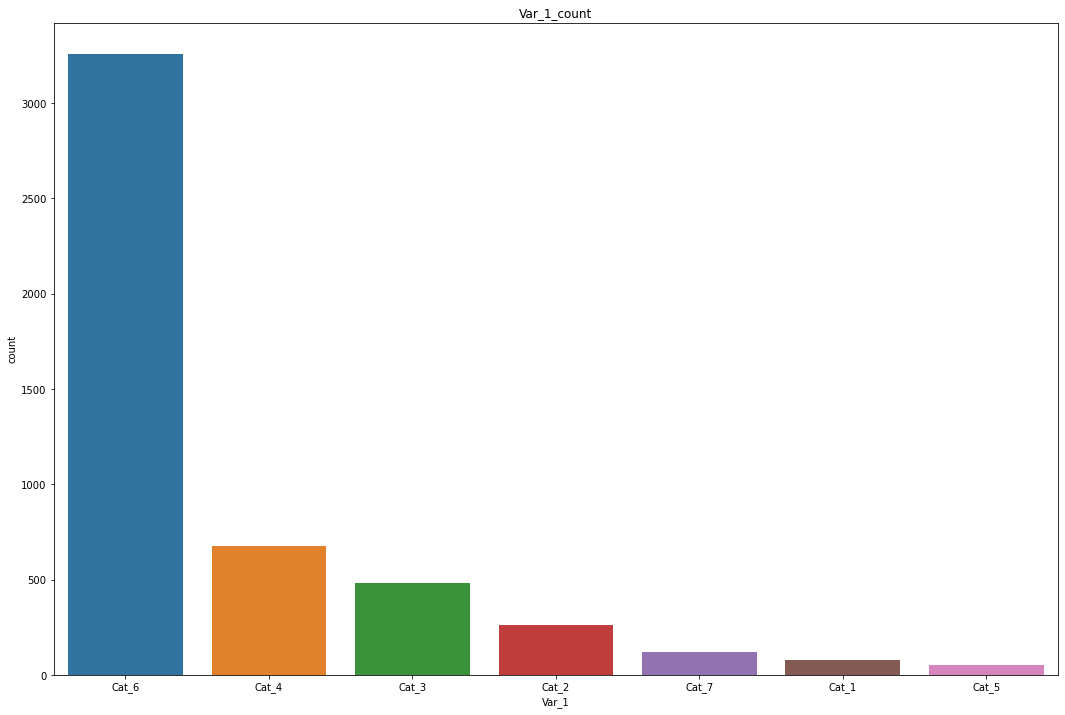

Testing dataset


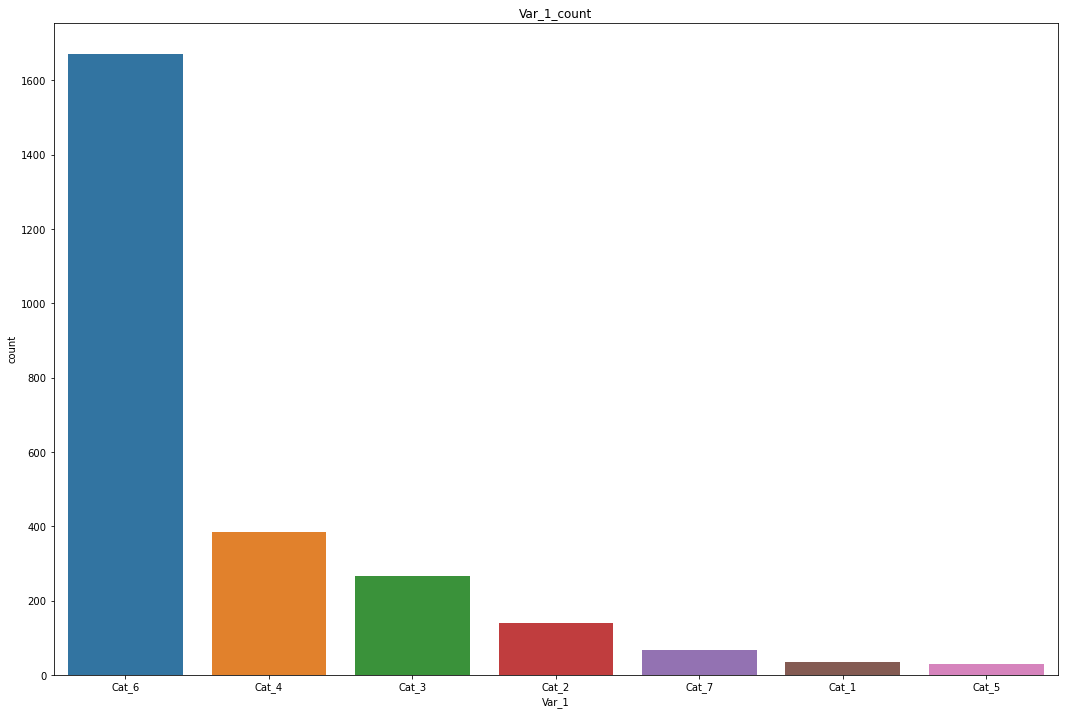

Segmentation
Training dataset


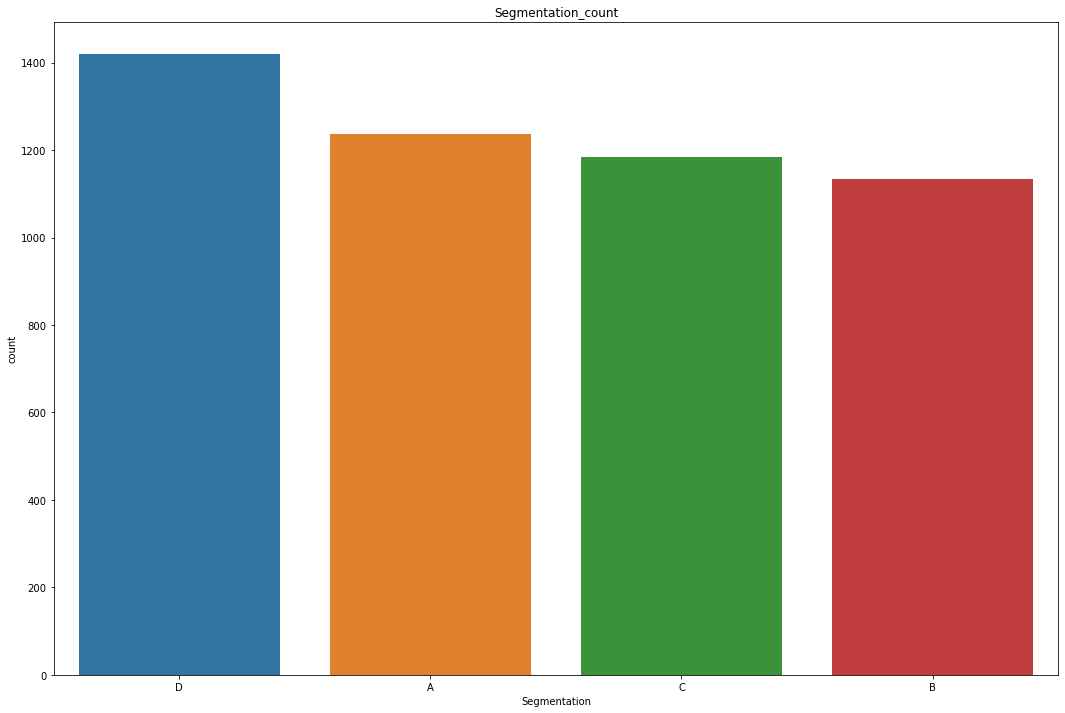

Testing dataset


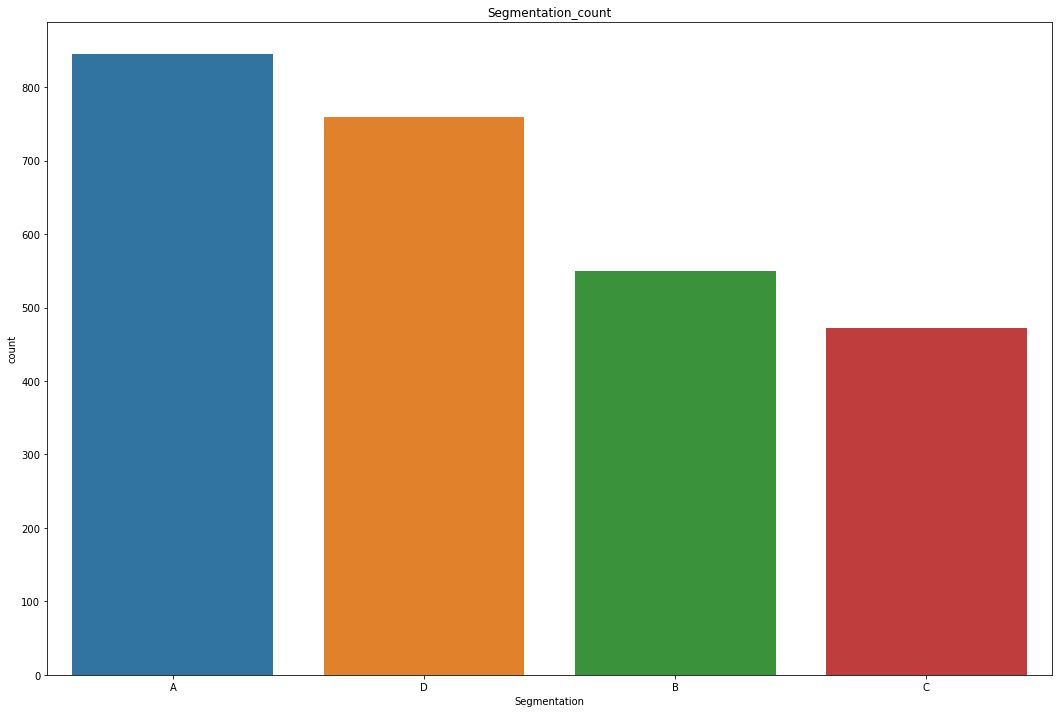

----------------------------------------------------------------------------------------------------

Training dataset


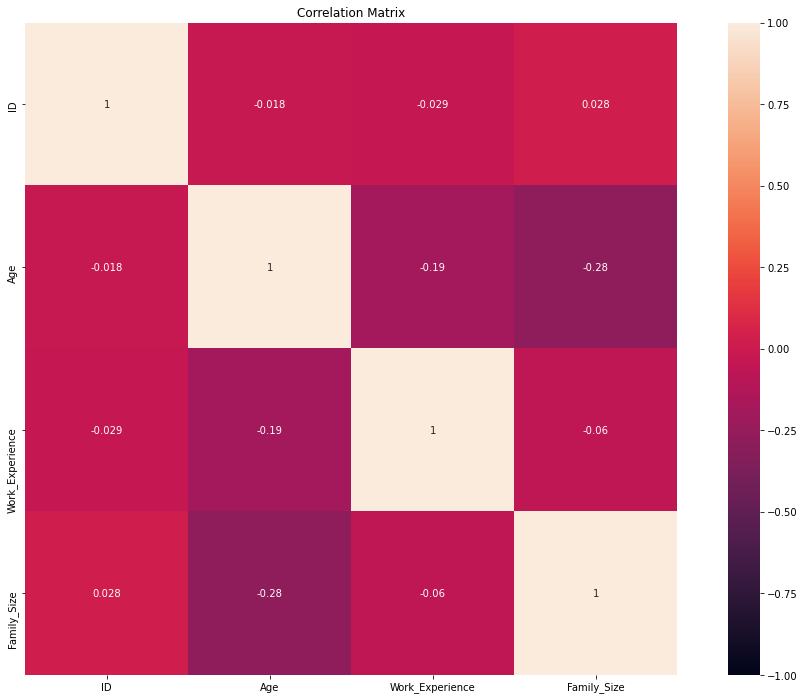

Testing dataset


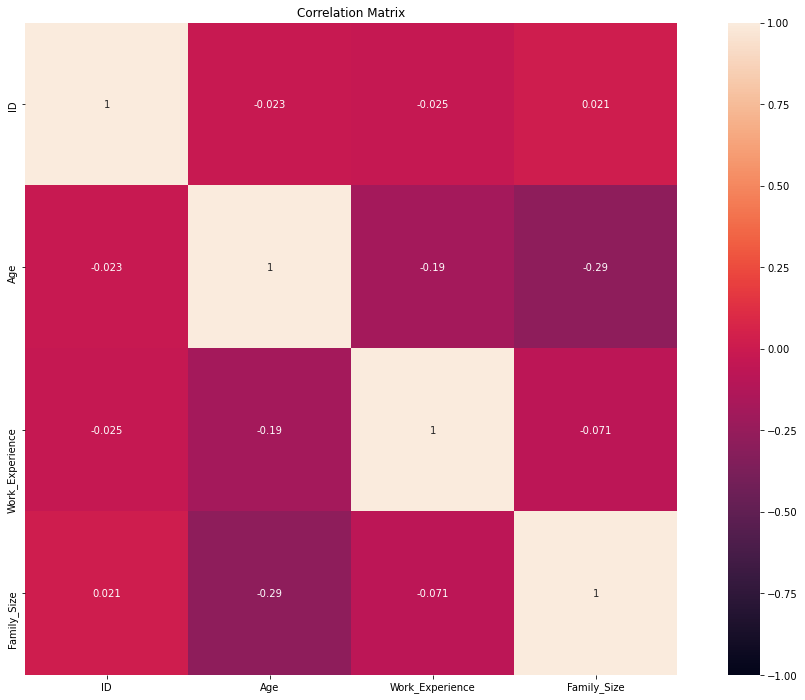

In [9]:
print('Training dataset')
get_null(df_raw)
print('Testing dataset')
get_null(test_raw)
print('-'*100, end='\n\n')

print('Training dataset')
get_describe(df_raw)
print('Testing dataset')
get_describe(test_raw)

print('-'*100, end='\n\n')
for col in df_raw.select_dtypes(include='number'):
    print(col)
    print('Training dataset')
    plot_numeric(df_raw, col)
    print('Testing dataset')
    plot_numeric(test_raw, col)

print('-'*100, end='\n\n')
for col in df_raw.select_dtypes(include='object'):
    print(col)
    print('Training dataset')
    plot_category(df_raw, col)
    print('Testing dataset')
    plot_category(test_raw, col)
    
print('-'*100, end='\n\n')
print('Training dataset')
plot_corr(df_raw)
print('Testing dataset')
plot_corr(test_raw)

#### Summary of data exploration
After the above data exploration, I see a big difference between the sample behavior. It is believed that the sampling is not properly done. Hence, I believe the training set cannot represent the population behavior.

Gender: Male is 10%~20% more than female in the training set while 10% female is more than male in the testing set
Ever_Married: Similar to Gender, married status takes over 60% of the population in training set while single dominate the testing set
Graduated: Similar to Gender and Ever_Married situation. Graduated occupied the training dataset and Non-graduate occupied the testing dataset

#### Points to take note for data cleansing
ID should be dropped as it is meaningless
Outlier on Age, Work_Experience and Family_Size
Data Cleansing on Gender, Ever_Married and Graduate should be careful.
Points to take note for data modeling
Gender, Ever_married and Graduated could/might be dropped if the validation accuracy is higher but not the testing accuracy.
Age could be binned

#### data cleansing
fill empty Ever_Married with No
fill empty Graduated with No
fill empty Profession with Artist (The most common one)
fill empty Var_1 with Cat_6 (The most common one)
fill empty Work_Experience with median then remove outliers by interquantile
fill empty Family_Size with median then remove outliers by interquantile
Drop ID
Map segment into numeric

In [10]:
def data_transform(df):
    # function is created for easy handle for both training and testing dataset
    def remove_outlier(df, col):
        lowq, highq = df[col].quantile(.25), df[col].quantile(.75)
        interq = 1.5 * (highq - lowq)
        lowq -= interq
        highq += interq
        return df[col].apply(lambda x: lowq if x < lowq else highq if x > highq else x)
    
    df['Ever_Married'] = df['Ever_Married'].fillna('No')
    df['Graduated'] = df['Graduated'].fillna('No')
    for col in ['Profession', 'Var_1']:
        df[col] = df[col].fillna(df[col].mode().values[0])
    for col in ['Work_Experience', 'Family_Size']:
        df[col] = df[col].fillna(df[col].median())
        df[col] = remove_outlier(df, col)
    df.drop(columns=['ID'], inplace=True)
    segment_map = {'A':1, 'B':2, 'C':3, 'D':4}
    df['Segmentation'] = df['Segmentation'].map(segment_map)
    for col in df.select_dtypes(exclude='number'):
        df[col] = df[col].apply(lambda x: str(x).strip())
    return df

In [11]:
cleanset = data_transform(df_raw.copy())
cleanset.shape
test_cleanset = data_transform(test_raw.copy())
test_cleanset.shape

(2627, 10)

In [20]:
#Data Modelling
# RandomForest, Logistic Regression will be validated to figure out the best algorithm for this part.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, plot_confusion_matrix

def data_model_cleansing(df):
    y = df['Segmentation']
    df.drop(columns=['Segmentation'], inplace=True)
    #Seperate checking have completed and find out the creation of Age bin will lose model accuracy. 
    #df['Age'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 90], 
    #                   labels=['Group_' + str(i) for i in range(20, 81, 10)])
    for col in df.select_dtypes(exclude='number').columns.values:
        df = pd.concat([pd.get_dummies(df[col], prefix=col), df], axis=1)
        df.drop(columns=col, inplace=True)
    return df, y

In [21]:
trainset, y = data_model_cleansing(cleanset.copy())
trainset.info()
X_test, y_test = data_model_cleansing(test_cleanset.copy())
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4977 entries, 0 to 4976
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Var_1_Cat_1               4977 non-null   uint8  
 1   Var_1_Cat_2               4977 non-null   uint8  
 2   Var_1_Cat_3               4977 non-null   uint8  
 3   Var_1_Cat_4               4977 non-null   uint8  
 4   Var_1_Cat_5               4977 non-null   uint8  
 5   Var_1_Cat_6               4977 non-null   uint8  
 6   Var_1_Cat_7               4977 non-null   uint8  
 7   Spending_Score_Average    4977 non-null   uint8  
 8   Spending_Score_High       4977 non-null   uint8  
 9   Spending_Score_Low        4977 non-null   uint8  
 10  Profession_Artist         4977 non-null   uint8  
 11  Profession_Doctor         4977 non-null   uint8  
 12  Profession_Engineer       4977 non-null   uint8  
 13  Profession_Entertainment  4977 non-null   uint8  
 14  Professi

In [14]:
tree = RandomForestClassifier(random_state=0)
logit = LogisticRegression(random_state=0)
algos = [tree, logit]
def ML(algo, x, y, res_dict = dict()):
    X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
    print(f'Training set size: {X_train.shape}, Validation set size: {X_valid.shape}')
    
    model = algo.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    train_acc = model.score(X_train, y_train)
    valid_acc = model.score(X_valid, y_valid)
    valid_prec = precision_score(y_true=y_valid, y_pred=y_pred, average='micro')
    valid_rec = recall_score(y_true=y_valid, y_pred=y_pred, average='micro')
    cross_val = cross_val_score(model, X_valid, y_valid, cv=3).mean()
    
    print(f'Algorithm name: {model.__class__.__name__}')
    print('-'*100)
    print(f'Training accuracy: {train_acc:.4f}, Validation accuracy: {valid_acc:.4f}')
    print(f'Validation precision score: {valid_prec:.4f}, Validation recall score: {valid_rec:.4f}')
    print(f'Cross validation score: {cross_val:.4f}')
    print('-'*100)
    print(classification_report(y_true=y_valid, y_pred=y_pred))
    print('-'*100)
    
    #plot confusion matrix and report
    plot_confusion_matrix(model, X_valid, y_valid, display_labels=model.classes_,
                         normalize='true', cmap=plt.cm.Blues, )
    plt.title('Normalized Confusion Matrix')
    plt.show()
    print('-'*100)
    res_dict[model.__class__.__name__+'_train_acc'] = train_acc
    res_dict[model.__class__.__name__+'_valid_acc'] = valid_acc
    res_dict[model.__class__.__name__+'_valid_prec'] = valid_prec
    res_dict[model.__class__.__name__+'_valid_rec'] = valid_rec
    res_dict[model.__class__.__name__+'_cross_val'] = cross_val
    return model, res_dict

def test_ML(model, X_test, y_test, res_dict):
    y_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    test_prec = precision_score(y_true=y_test, y_pred=y_pred, average='micro')
    test_rec = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
    cross_val = cross_val_score(model, X_test, y_test, cv=3).mean()
    
    print(f'Testing Algorithm name: {model.__class__.__name__}')
    print('-'*100)
    print(f'Testing accuracy: {test_acc:.4f}, Testing precision: {test_prec:.4f}, Testing recall: {test_rec:.4f}')
    print(f'Cross validation score: {cross_val:.4f}')
    print('-'*100)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print('-'*100)
    #plot confusion matrix and report
    plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_,
                         normalize='true', cmap=plt.cm.Blues, )
    plt.title('Normalized Confusion Matrix')
    plt.show()
    print('-'*100)
    res_dict[model.__class__.__name__+'_test_acc'] = test_acc
    res_dict[model.__class__.__name__+'_test_prec'] = test_prec
    res_dict[model.__class__.__name__+'_test_rec'] = test_rec
    res_dict[model.__class__.__name__+'_test_cross_val'] = cross_val
    return res_dict

Training set size: (3981, 28), Validation set size: (996, 28)
Algorithm name: RandomForestClassifier
----------------------------------------------------------------------------------------------------
Training accuracy: 0.9704, Validation accuracy: 0.4920
Validation precision score: 0.4920, Validation recall score: 0.4920
Cross validation score: 0.4659
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.41      0.44      0.42       248
           2       0.39      0.33      0.36       227
           3       0.51      0.52      0.51       237
           4       0.62      0.65      0.63       284

    accuracy                           0.49       996
   macro avg       0.48      0.48      0.48       996
weighted avg       0.49      0.49      0.49       996

----------------------------------------------------------------------------------------------------


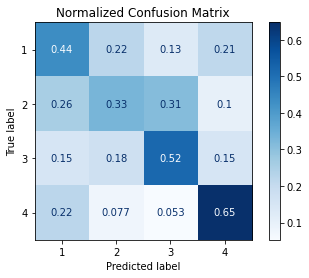

----------------------------------------------------------------------------------------------------
Testing Algorithm name: RandomForestClassifier
----------------------------------------------------------------------------------------------------
Testing accuracy: 0.3167, Testing precision: 0.3167, Testing recall: 0.3167
Cross validation score: 0.3080
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.36      0.27      0.31       846
           2       0.22      0.24      0.23       550
           3       0.23      0.29      0.26       472
           4       0.42      0.43      0.43       759

    accuracy                           0.32      2627
   macro avg       0.31      0.31      0.31      2627
weighted avg       0.32      0.32      0.32      2627

----------------------------------------------------------------------------------------------------


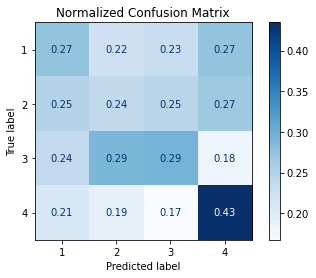

----------------------------------------------------------------------------------------------------
Training set size: (3981, 28), Validation set size: (996, 28)
Algorithm name: LogisticRegression
----------------------------------------------------------------------------------------------------
Training accuracy: 0.5087, Validation accuracy: 0.4980
Validation precision score: 0.4980, Validation recall score: 0.4980
Cross validation score: 0.4930
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.44      0.50      0.46       248
           2       0.30      0.15      0.20       227
           3       0.47      0.60      0.53       237
           4       0.66      0.69      0.67       284

    accuracy                           0.50       996
   macro avg       0.47      0.48      0.47       996
weighted avg       0.48      0.50      0.48       996

-----------

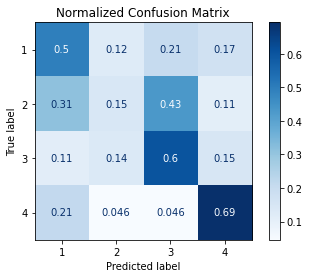

----------------------------------------------------------------------------------------------------
Testing Algorithm name: LogisticRegression
----------------------------------------------------------------------------------------------------
Testing accuracy: 0.3224, Testing precision: 0.3224, Testing recall: 0.3224
Cross validation score: 0.3335
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.34      0.32      0.33       846
           2       0.21      0.10      0.14       550
           3       0.23      0.40      0.29       472
           4       0.44      0.44      0.44       759

    accuracy                           0.32      2627
   macro avg       0.30      0.31      0.30      2627
weighted avg       0.32      0.32      0.31      2627

----------------------------------------------------------------------------------------------------


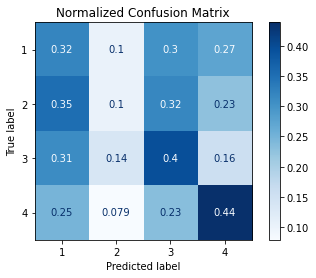

----------------------------------------------------------------------------------------------------


In [15]:
res = dict()
for algo in algos:
    model, res = ML(algo, trainset, y)
    res = test_ML(model, X_test, y_test, res)

[Text(177.05769230769232, 195.696, 'X[15] <= 0.5\nmse = 1.314\nsamples = 3981\nvalue = 2.561'),
 Text(103.01538461538462, 152.208, 'X[25] <= 34.0\nmse = 1.19\nsamples = 3316\nvalue = 2.378'),
 Text(51.50769230769231, 108.72, 'X[10] <= 0.5\nmse = 1.732\nsamples = 762\nvalue = 2.65'),
 Text(25.753846153846155, 65.232, 'X[21] <= 0.5\nmse = 1.753\nsamples = 595\nvalue = 2.771'),
 Text(12.876923076923077, 21.744, 'mse = 1.865\nsamples = 156\nvalue = 2.385'),
 Text(38.63076923076923, 21.744, 'mse = 1.641\nsamples = 439\nvalue = 2.909'),
 Text(77.26153846153846, 65.232, 'X[25] <= 24.0\nmse = 1.415\nsamples = 167\nvalue = 2.216'),
 Text(64.38461538461539, 21.744, 'mse = 0.36\nsamples = 10\nvalue = 3.8'),
 Text(90.13846153846154, 21.744, 'mse = 1.312\nsamples = 157\nvalue = 2.115'),
 Text(154.52307692307693, 108.72, 'X[18] <= 0.5\nmse = 1.0\nsamples = 2554\nvalue = 2.298'),
 Text(128.76923076923077, 65.232, 'X[9] <= 0.5\nmse = 0.964\nsamples = 2483\nvalue = 2.275'),
 Text(115.8923076923077, 21.

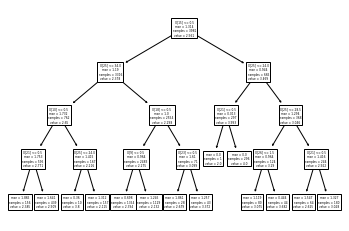

In [22]:
from sklearn.tree import DecisionTreeRegressor
# max_depth=1 because we only have 3 rows
tree1=DecisionTreeRegressor(max_depth=4)
X_train, X_valid, y_train, y_valid = train_test_split(trainset, y, test_size=0.2, random_state=0, stratify=y)
tree1.fit(X_train,y_train)
DecisionTreeRegressor(max_depth=1)
from sklearn.tree import plot_tree
plot_tree(tree1)

#### Summary of data modeling :

By listing out the feature importance (or any other), we can see (1) Working_Experience (2) Profession (3) Graduated and (4) Ever_Married have contributed a significant part of the model. However, we do have a large proportion of data is filled by ourselves.

#### Conclusion:

It can be found that all the 3 models performance are not so good(accuracy is around 42%). As next step, i am thinking to add some log terms and prepare data for better precision. Also, Planning to tryout gradient boost technique to decrease the mse value.
